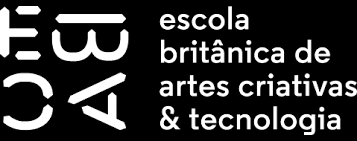

___

<center><h1>Exercício 03 - Módulo 23</h1></center>
<center><h1>Random Forest: Hyperparâmetros</h1></center>



## **Curso**: Cientista de Dados 
## **Aluno**: Victor Resende

___

### Técnicas de Ensemble

Significa um algoritmo que utiliza vários modelos em conjunto com o objetivo de obter um modelo final com melhores resultados.

**Random Forest:**

**Random Forest** é um ensemble de árvores de decisão treinadas em subconjuntos de dados e subconjuntos de features. Ele usa uma abordagem de bagging combinada com a seleção aleatória de features para reduzir o overfitting e aumentar a robustez. O Random Forest traz vários **hyperprâmetros** que nos auxiliam na obtenção do melhor resultado para o nosso modelo.

#### 1. Quais são os hiperparâmetros do Random Forest?


Os principais hiperparâmetros do Random Forest são:


- **n_estimators**: número de árvores na floresta.
- **max_features**: número máximo de features (variáveis) a serem consideradas na divisão de cada nó.
- **max_depth**: profundidade máxima das árvores individuais.
- **min_samples_split**: número mínimo de amostras necessárias para dividir um nó.
- **min_samples_leaf**: número mínimo de amostras em uma folha.
- **bootstrap**: define se o método de amostragem com reposição (bootstrap) será utilizado.
- **criterion**: função de medida de qualidade da divisão (por exemplo, "gini" ou "entropy").
- **max_samples**: o número máximo de amostras a serem usadas para construir cada árvore (caso o bootstrap seja verdadeiro).

#### 2. Para quê serve cada um desses parâmetros?


- **n_estimators**: Define quantas árvores o modelo irá treinar. Mais árvores podem aumentar a estabilidade do modelo, mas também aumentam o tempo de processamento.

- **max_features**: Controla o número de features usadas para procurar a melhor divisão em cada nó. Valores menores podem reduzir a correlação entre as árvores e aumentar a diversidade (e performance) do ensemble.

- **max_depth**: Controla até que ponto a árvore se ramifica. Árvores muito profundas podem aprender detalhes demais do conjunto de treino, levando a overfitting.

- **min_samples_split**: Define o número mínimo de amostras que um nó precisa para ser dividido. Valores altos podem fazer com que a árvore seja menos complexa (mais generalizada).

- **min_samples_leaf**: Define o número mínimo de amostras que uma folha deve conter. Árvores mais generalizadas podem ser criadas ao aumentar esse valor.

- **bootstrap**: Se for True, amostragem com reposição será usada para criar os dados de treino para cada árvore, promovendo a diversidade entre elas.

- **criterion**: Determina o método de avaliação para encontrar a melhor divisão (Gini ou Entropia no caso da classificação).

- **max_samples**: Quando bootstrap=True, limita o número de amostras usadas para treinar cada árvore, o que pode ser útil para controlar o sobreajuste.

#### Resumo da ópera:

Com o ajuste dos **hiperparâmetros**, podemos encontrar uma combinação que maximize a capacidade de generalização do modelo **sem overfitting**.

#### Exemplificando com o código:

In [14]:
#Carregando os pacotes necessários:

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

# Carregando os dados do Iris:
data = load_iris()
X, y = data.data, data.target

# Dividindo em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definindo o Random Forest:
rf = RandomForestClassifier(random_state=42)

# Definindo os parâmetros a serem otimizados:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Fazendo a busca pelos melhores hiperparâmetros:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Imprimindo os melhores hiperparâmetros encontrados:
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Treinando o modelo final com os melhores hiperparâmetros:
best_rf = grid_search.best_estimator_

# Avaliando no conjunto de teste:
accuracy_test = best_rf.score(X_test, y_test)
print(f"Acurácia no conjunto de teste: {accuracy_test:.4f}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Melhores hiperparâmetros: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Acurácia no conjunto de teste: 1.0000


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


### Visualização dos dados:

Gerando os gráficos para visualizar o impacto dos hiperparâmetros otimizados usando o **GridSearchCV**:
- O impacto do número de árvores (n_estimators) na acurácia.
- O impacto da profundidade máxima das árvores (max_depth) na acurácia.
- Comparação entre os parâmetros de amostragem (bootstrap=True ou False).

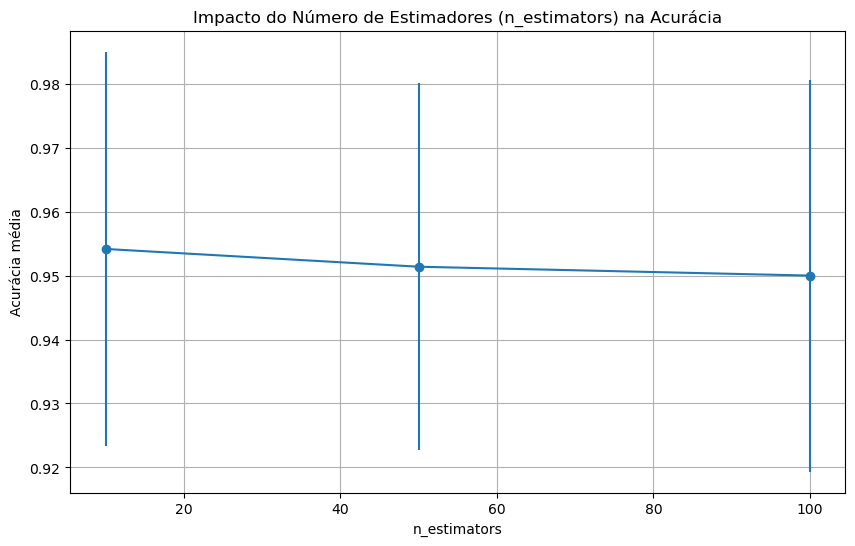

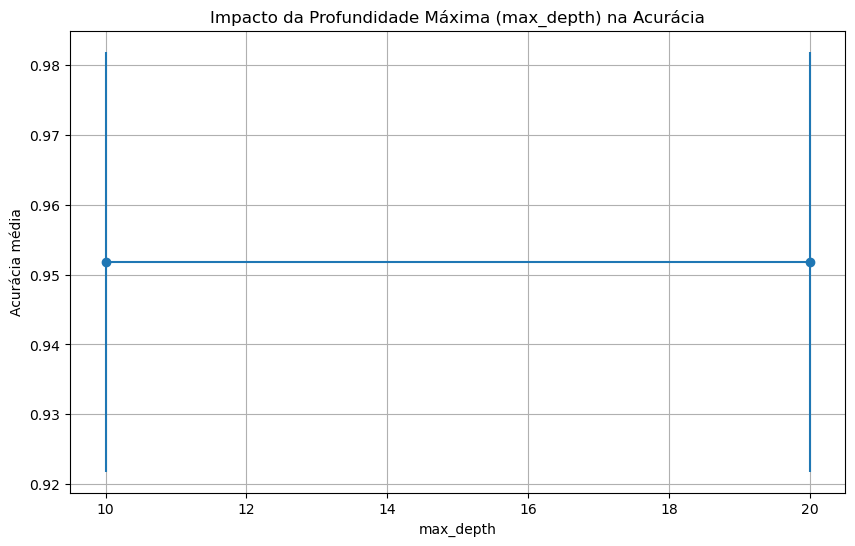

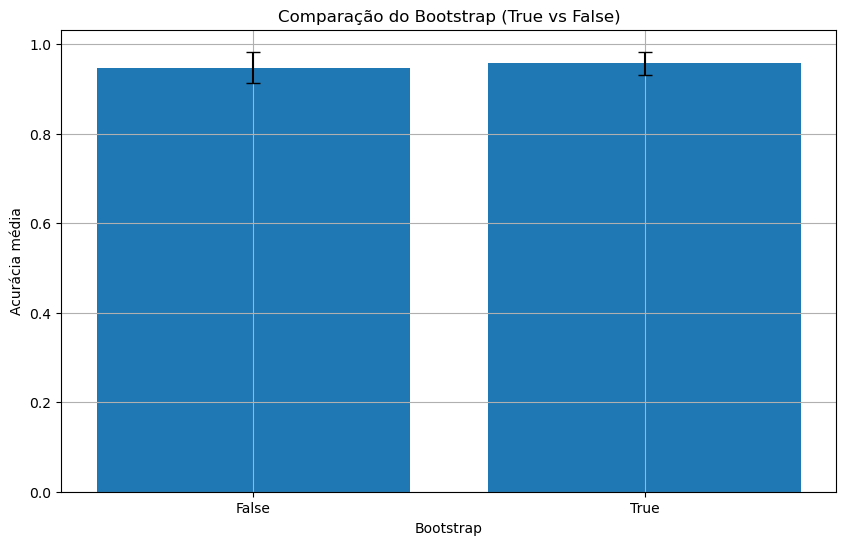

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Obtendo os resultados do GridSearchCV:
results = pd.DataFrame(grid_search.cv_results_)

# Plotando o impacto de 'n_estimators' na acurácia:
plt.figure(figsize=(10, 6))
n_estimators_means = results.groupby('param_n_estimators')['mean_test_score'].mean()
n_estimators_stds = results.groupby('param_n_estimators')['std_test_score'].mean()
plt.errorbar(n_estimators_means.index, n_estimators_means, yerr=n_estimators_stds, fmt='-o')
plt.title('Impacto do Número de Estimadores (n_estimators) na Acurácia')
plt.xlabel('n_estimators')
plt.ylabel('Acurácia média')
plt.grid(True)
plt.show()

# Plotando o impacto de 'max_depth' na acurácia:
plt.figure(figsize=(10, 6))
max_depth_means = results.groupby('param_max_depth')['mean_test_score'].mean()
max_depth_stds = results.groupby('param_max_depth')['std_test_score'].mean()
plt.errorbar(max_depth_means.index, max_depth_means, yerr=max_depth_stds, fmt='-o')
plt.title('Impacto da Profundidade Máxima (max_depth) na Acurácia')
plt.xlabel('max_depth')
plt.ylabel('Acurácia média')
plt.grid(True)
plt.show()

# Comparação entre bootstrap True e False:
plt.figure(figsize=(10, 6))
bootstrap_means = results.groupby('param_bootstrap')['mean_test_score'].mean()
bootstrap_stds = results.groupby('param_bootstrap')['std_test_score'].mean()
plt.bar(bootstrap_means.index.astype(str), bootstrap_means, yerr=bootstrap_stds, capsize=5)
plt.title('Comparação do Bootstrap (True vs False)')
plt.xlabel('Bootstrap')
plt.ylabel('Acurácia média')
plt.grid(True)
plt.show()


### Análises:

Explicação dos Gráficos:

- **Impacto de n_estimators**:

Este gráfico mostra como o número de árvores afeta a acurácia média do modelo. Em geral, mais árvores tendem a melhorar a performance até certo ponto, depois disso o ganho diminui.

- **Impacto de max_depth**:

Esse gráfico mostra o efeito de limitar a profundidade das árvores. Árvores mais profundas podem capturar mais complexidade, mas isso pode levar ao overfitting. Um equilíbrio é importante.

- **Comparação entre bootstrap=True e bootstrap=False**:

Aqui, vemos a diferença de performance ao usar a amostragem com reposição. Bootstrap=True tende a ser o padrão no Random Forest, e a comparação visual nos dá uma ideia se vale a pena manter ou alterar esse valor.
Esses gráficos ajudam, então, a visualizarmos o impacto direto de cada hiperparâmetro.

- No gráfico, abaixo, verificamos a **ausência de overfitting**, atestando a eficácia do nosso modelo:

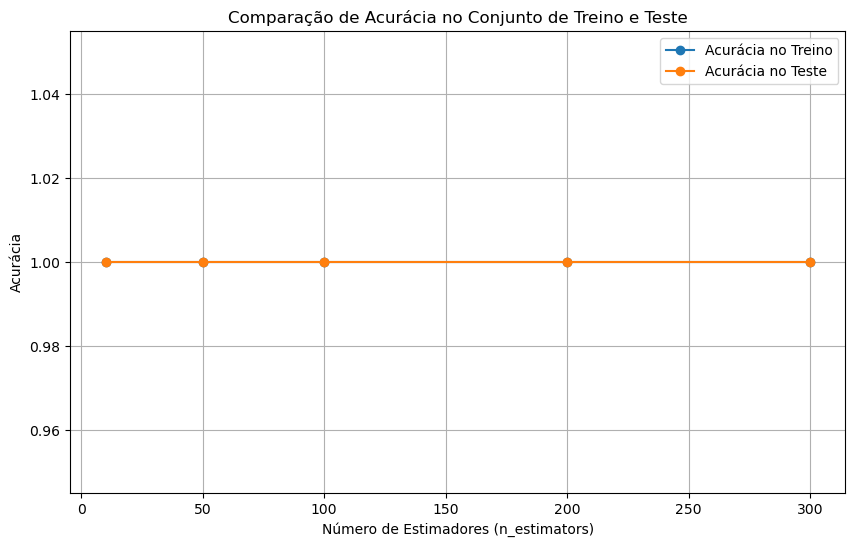

In [31]:
# Avaliar o modelo no conjunto de treino e teste para os melhores hiperparâmetros
train_scores = []
test_scores = []

# Testar diferentes valores de 'n_estimators'
n_estimators_values = [10, 50, 100, 200, 300]
for n in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Acurácia no conjunto de treino
    train_accuracy = rf_model.score(X_train, y_train)
    train_scores.append(train_accuracy)
    
    # Acurácia no conjunto de teste
    test_accuracy = rf_model.score(X_test, y_test)
    test_scores.append(test_accuracy)

# Plotar o gráfico de comparação
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_scores, label='Acurácia no Treino', marker='o')
plt.plot(n_estimators_values, test_scores, label='Acurácia no Teste', marker='o')
plt.title('Comparação de Acurácia no Conjunto de Treino e Teste')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()


#### Documentação pesquisada:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

______